In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib
from lmfit import models

In [3]:
df10 = pd.read_csv("../data/10-metingen.csv")

df10_mean = df10.mean()
df10_std = df10.std()
df10_std_mean = df10_std / np.sqrt(df10.size)

print("1. Average: %.2f, STD: %.2f, STD of average: %.2f" % (df10_mean, df10_std, df10_std_mean))

print("2. Result: %.2f ± %.2f" % (df10_mean, df10_std_mean))

# $$(1 - erf(dist_sigma / sqrt(2))) / 2$$
print("3. Chance of x >= 75 is %.2f" % ((1 - math.erf((75 - df10_mean) / (df10_std * np.sqrt(2)))) / 2))

1. Average: 71.80, STD: 5.25, STD of average: 1.66
2. Result: 71.80 ± 1.66
3. Chance of x >= 75 is 0.27


In [4]:
df80 = pd.read_csv("../data/80-metingen.csv")

df80.describe()

,y
count,80.000000
mean,61.587500
std,16.779051
min,22.000000
25%,49.000000
50%,63.500000
75%,75.000000
max,91.000000


Text(0, 0.5, 'Count')

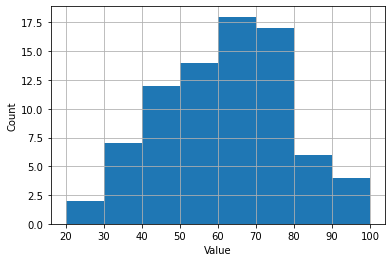

In [5]:
bins = np.arange(20, 101, 10)

plt.figure()
df80.y.hist(bins=bins)
plt.xlabel("Value")
plt.ylabel("Count")

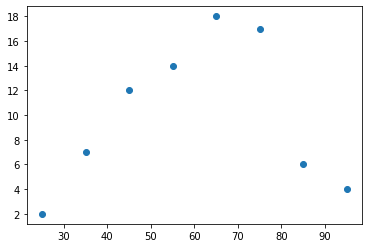

In [6]:
y, bins = np.histogram(df80.y, bins=bins)
x = (bins[:-1]+bins[1:])/2

plt.figure()
plt.scatter(x, y)

In [7]:
gauss = models.GaussianModel()
first_guess = gauss.guess(y, x)
first_guess

name,value,initial value,min,max,vary,expression
amplitude,720.000000,None,-inf,inf,True,
center,60.0000000,None,-inf,inf,True,
sigma,15.0000000,None,0.00000000,inf,True,
fwhm,35.3223000,None,-inf,inf,False,2.3548200*sigma
height,19.1492304,None,-inf,inf,False,"0.3989423*amplitude/max(1e-15, sigma)"


In [8]:
fit = gauss.fit(y, x=x, weights=1/np.sqrt(y), params=first_guess)
fit

Text(0, 0.5, 'Count')

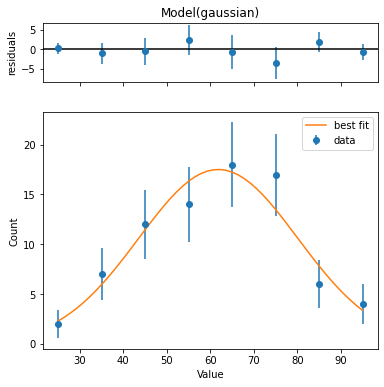

In [9]:
fit.plot(numpoints=50)
plt.xlabel("Value")
plt.ylabel("Count")
